# Social Defeat Dopamine Analysis

DA data

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *
from sd_extension import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac_csvs"
brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc_csvs"
# brain_region = '#FFAF00'

In [3]:
bout_definitions = [
    {'prefix': 'bully', 'introduced': 'Subject_Introduced', 'removed': 'Subject_Removed'}
]

In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n5-240916-092748\Notes.txt
read from t=0s to t=868.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n6-240916-102216\Notes.txt
read from t=0s to t=860.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n7-240916-113157\Notes.txt
read from t=0s to t=862.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn1-250223-100216\Notes.txt
read from t=0s to t=866.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn2-250223-102714\Notes.txt
read from t=0s to t=861.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn3-250223-105155\Notes.txt
read from t=0s to t=864.35s
F

### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=True,
                                  max_bout_duration=9, 
                                  mode='standard')


Processing behaviors for n5-240916-092748...
Processing behaviors for n6-240916-102216...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...
Computing DA metrics for n5-240916-092748 ...
Computing DA metrics for n6-240916-102216 ...
Computing DA metrics for n7-240916-113157 ...
Computing DA metrics for nn1-250223-100216 ...
Computing DA metrics for nn2-250223-102714 ...
Computing DA metrics for nn3-250223-105155 ...
Computing DA metrics for nn4-250223-111644 ...
Computing DA metrics for nn5-250223-114717 ...
Computing DA metrics for nn6-250223-120921 ...
Computing DA metrics for nn7-250223-123200 ...
Computing DA metrics for nn8-2

In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['bully-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Defeat", desired_bouts=desired_bouts)

In [8]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n5,bully-1,Defeat,-0.134121,1.014666,0.024466
1,n6,bully-1,Defeat,0.522992,0.903491,0.062115
2,n7,bully-1,Defeat,-0.722844,0.067887,-0.318602
3,nn1,bully-1,Defeat,-5.083399,0.304927,-0.622527
4,nn2,bully-1,Defeat,-0.702217,1.005101,-0.110117
5,nn3,bully-1,Defeat,-1.449587,1.187945,-0.170569


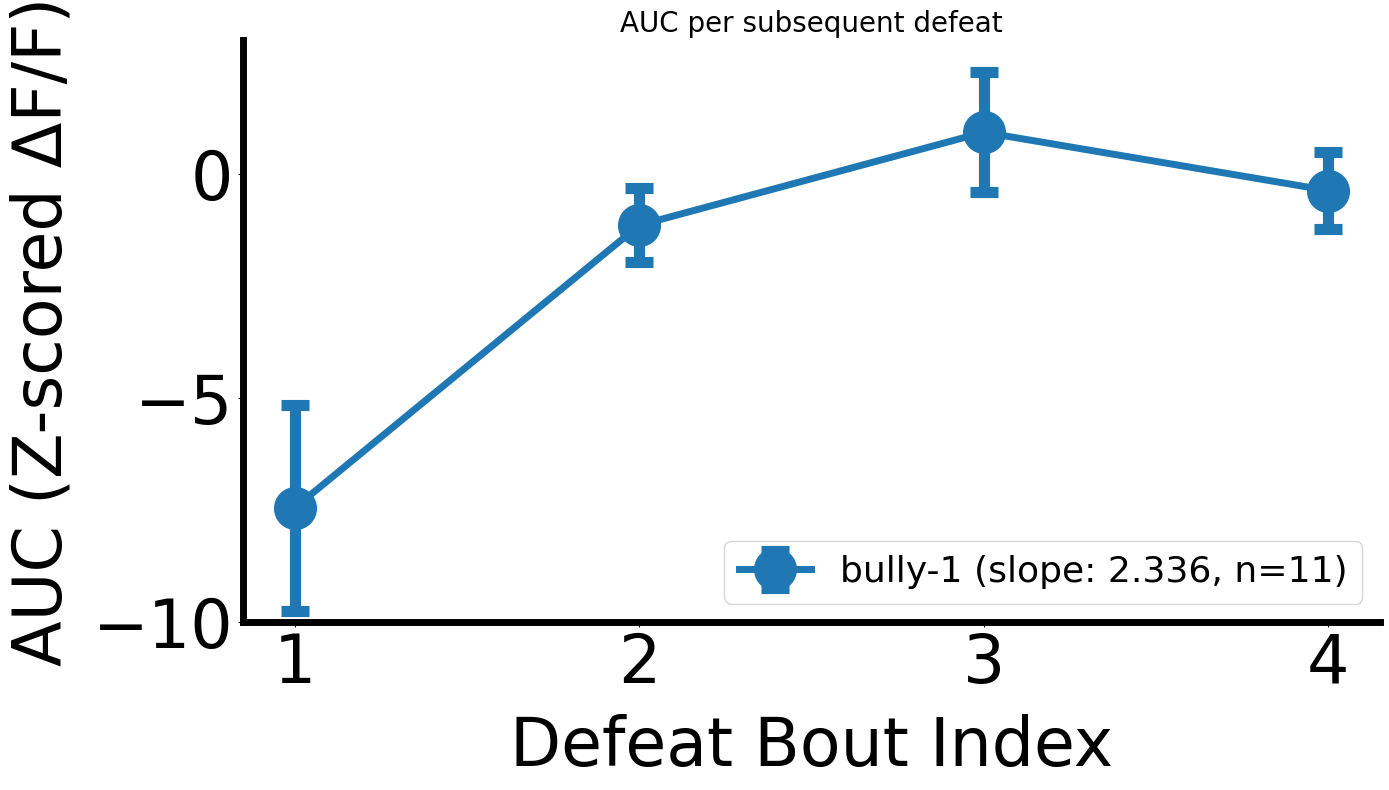


=== Computed Metric (SLOPE): ===
Bout: bully-1, slope = 2.336


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,bully-1,1,11,-7.454375,7.633697,2.301646
1,bully-1,2,11,-1.134946,2.726384,0.822036
2,bully-1,3,11,0.943147,4.450001,1.341726
3,bully-1,4,11,-0.359533,2.852685,0.860117


In [9]:
plot_peak_for_subsequent_behaviors(exp_da_dict, 
                                   selected_bouts=["bully-1"], 
                                   behavior="Defeat", 
                                   n_subsequent_behaviors=4,
                                   peak_col='AUC',
                                   xlabel="Defeat Bout Index",
                                    ylabel="AUC (Z-scored ΔF/F)",
                                    plot_title="AUC per subsequent defeat",
                                    ylim = (-10, 3),
                                    custom_colors=None,
                                    save_path=None)
                                    # figsize=(14,8),
                                    # save_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat\mPFC_defeat.png")


In [10]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)


Processing behaviors for n5-240916-092748...
Processing behaviors for n6-240916-102216...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...


In [11]:
experiment.compute_all_event_induced_DA(pre_time=4, post_time=10)

Computing event-induced DA for trial n5-240916-092748 ...
Computing event-induced DA for trial n6-240916-102216 ...
Computing event-induced DA for trial n7-240916-113157 ...
Computing event-induced DA for trial nn1-250223-100216 ...
Computing event-induced DA for trial nn2-250223-102714 ...
Computing event-induced DA for trial nn3-250223-105155 ...
Computing event-induced DA for trial nn4-250223-111644 ...
Computing event-induced DA for trial nn5-250223-114717 ...
Computing event-induced DA for trial nn6-250223-120921 ...
Computing event-induced DA for trial nn7-250223-123200 ...
Computing event-induced DA for trial nn8-250223-125722 ...


In [12]:
# experiment.trials['n7-240916-113157'].behaviors.head()

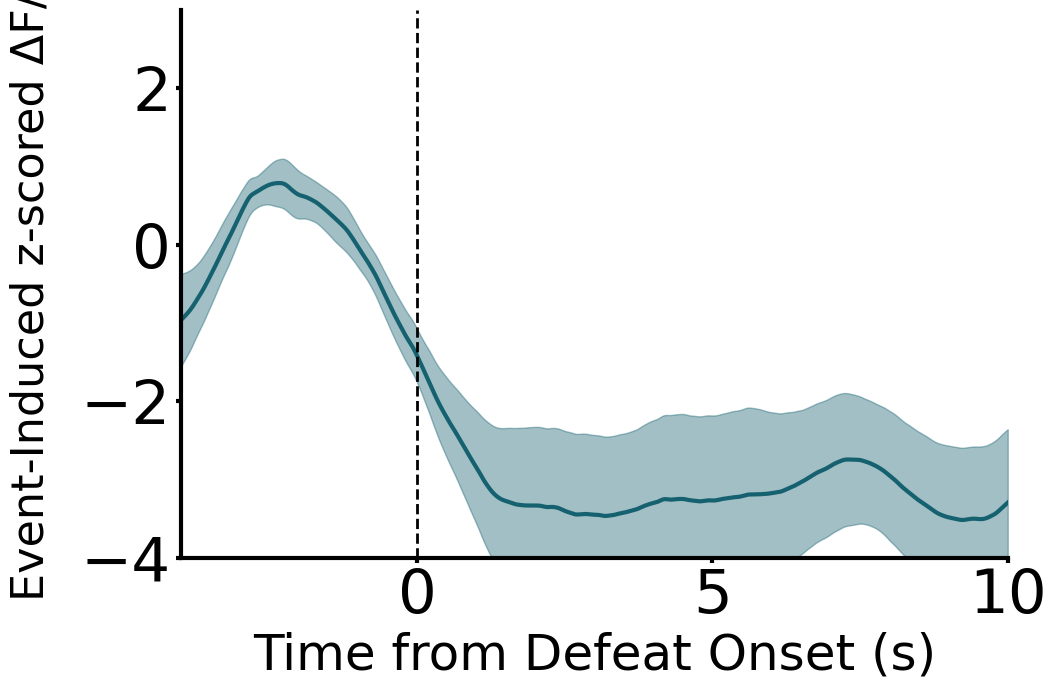

{'common_time_axis': array([-4.        , -3.99901696, -3.99803392, ...,  9.99750628,
         9.99848932,  9.99947236]),
 'mean_trace': array([-0.96725788, -0.96691115, -0.96619298, ..., -3.29720897,
        -3.29656023, -3.29605358]),
 'sem_trace': array([0.59538188, 0.59515657, 0.59454979, ..., 0.93808676, 0.93805169,
        0.93805693]),
 'n_trials': 11,
 'subject_ids': ['n5',
  'n6',
  'n7',
  'nn1',
  'nn2',
  'nn3',
  'nn4',
  'nn5',
  'nn6',
  'nn7',
  'nn8']}

In [ ]:
plot_average_defeat_bout_psth(
    experiment=experiment,
    nth_defeat=1,
    save=False,
    save_path= r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout1_Average.png",
    y_min=-4, 
    y_max=3,
    brain_region=brain_region
)


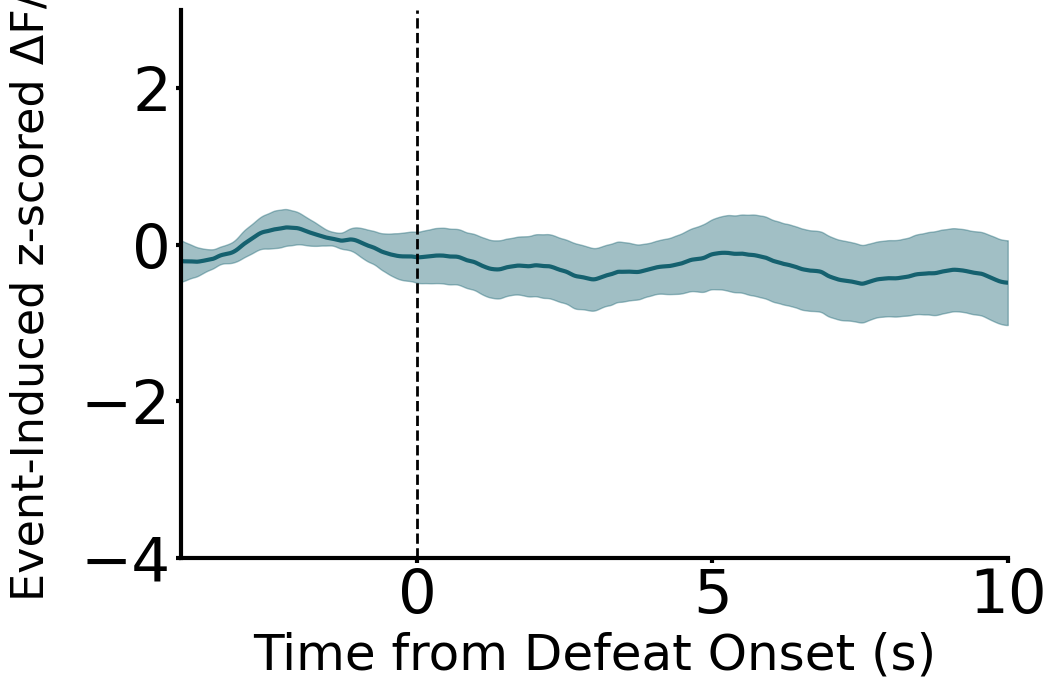

{'common_time_axis': array([-4.        , -3.99901696, -3.99803392, ...,  9.99750628,
         9.99848932,  9.99947236]),
 'mean_trace': array([-0.20622512, -0.20643011, -0.20656195, ..., -0.48467777,
        -0.48468643, -0.48466161]),
 'sem_trace': array([0.26702952, 0.26693243, 0.26666152, ..., 0.54135448, 0.54133417,
        0.54131785]),
 'n_trials': 11,
 'subject_ids': ['n5',
  'n6',
  'n7',
  'nn1',
  'nn2',
  'nn3',
  'nn4',
  'nn5',
  'nn6',
  'nn7',
  'nn8']}

In [ ]:
plot_average_defeat_bout_psth(
    experiment=experiment,
    nth_defeat=2,
    save=False,
    save_path=r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout2_Average.png",
    y_min=-4, 
    y_max=3,
    brain_region=brain_region
)